In [1]:
from Modelos import Gerador, GeradorClassificador
from Preprocessamento import preprocessamento_dataframe
from segmentandoDatasets import *

2024-11-12 14:14:34.998101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-12 14:14:35.011738: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-12 14:14:35.015737: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 14:14:35.025653: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-12 14:14:35.935976: W tensorflow/compiler/tf2

In [2]:
gerador = Gerador()
gerador.carrega_modelo('Modelos/Modelo_Kyoto-7/Modelo-Base/Estrutura/Modelo_Kyoto-7.keras', 'Modelos/Modelo_Kyoto-7/Modelo-Base/Pesos/Modelo_Kyoto-7_Base:Kyoto.weights.h5')

I0000 00:00:1731431677.290414   28322 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731431677.324774   28322 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731431677.325017   28322 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731431677.326044   28322 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 1960)           │    32,159,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │    32,176,435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,336,139 (245.42 MB)

 Trainable params: 64,336,139 (245.42 MB)

 Non-trainable params: 0 (0.00 B)

(<Functional name=autoencoder, built=True>,
 <Functional name=encoder, built=True>,
 <Functional name=decoder, built=True>)

In [3]:
encoder = gerador.encoder

In [4]:
#segmentacao_PKLot(imagens_treino=500, dias_treino=5, imagens_validacao=300, dias_validaco=1, imagens_teste=2000, dias_teste=2, faculdades=["PUC"])

treino_PUC, _ = preprocessamento_dataframe(caminho_csv='CSV/PUC_Segmentado_Treino.csv', autoencoder=False)
validacao_PUC, _ = preprocessamento_dataframe(caminho_csv='CSV/PUC_Segmentado_Validacao.csv', autoencoder=False)
teste_PUC, teste_PUC_df = preprocessamento_dataframe(caminho_csv='CSV/PUC_Segmentado_Teste.csv', autoencoder=False, data_algumentantation=False)

Found 500 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


Pesos carregados com sucesso
Epoch 1/10


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:591: UserWarning: A total of 3 objects could not be loaded. Example error message for object <Dense name=dense, built=True>:

Layer 'dense' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=dense, built=True>, <Dense name=dense_1, built=True>, <Dense name=dense_2, built=True>]
  warnings.warn(msg)
/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731431680.317470   28388 service.cc:146] XLA service 0x7a3ea40076c0 initialized for platform CUDA (this doe

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7032 - loss: 0.5565

I0000 00:00:1731431682.491115   28388 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.7298 - loss: 0.5252
Epoch 1: val_loss improved from -inf to 0.42811, saving model to Pesos_parciais/weights-improvement-01-0.43.weights.h5
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 0.7540 - loss: 0.4933 - val_accuracy: 0.8200 - val_loss: 0.4281
Epoch 2/10
13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9111 - loss: 0.2495
Epoch 2: val_loss did not improve from 0.42811
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9120 - loss: 0.2509 - val_accuracy: 0.8433 - val_loss: 0.3534
Epoch 3/10
 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9584 - loss: 0.1268
Epoch 3: val_loss did not improve from 0.42811
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9556 - loss: 0.1479 - val_accuracy: 0.8600 - val_loss: 0.2855
Epoch 4/10
 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9558 - loss: 0.2426
Epoch 4: val_loss did not improve from 0.42811
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9566 - 

/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
[1 0 0 ... 1 1 0]


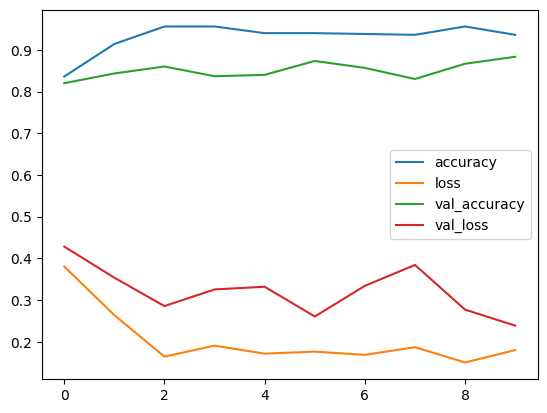

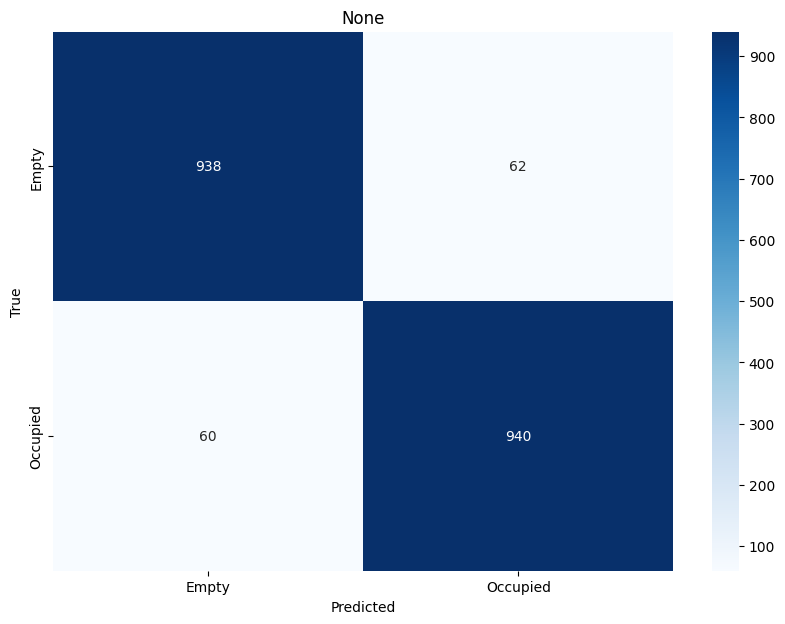

array([1, 0, 0, ..., 1, 1, 0])

In [5]:
#Exemplo de uso:
classificador = GeradorClassificador(encoder=encoder, pesos="Modelos/Modelo_Kyoto-7/Modelo-Base/Pesos/Modelo_Kyoto-7_Base:Kyoto.weights.h5")
classificador.Dataset(treino_PUC, validacao_PUC, teste_PUC)
classificador.compila()
classificador.treinamento(epocas=10)
classificador.predicao(teste_PUC_df)